In [19]:
import pandas as pd                         #Data
import matplotlib.pyplot as plt             #Gráficas
import nltk                                 #Preprocesamiento
pd.options.display.max_columns = None
nltk.download('punkt')
from nltk.tokenize import word_tokenize     # Palabras
from nltk.probability import FreqDist       # Evaluación de frecuencia
from nltk.corpus import stopwords           # Palabras vacías
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MARIAFLOREZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MARIAFLOREZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
#Función abrir respuestas
def apertura_rta(resp):
    lista_resp = []
    for r in resp:
        f = open(r, encoding="utf8")
        raw = f.read()
        lista_resp.append(raw)
    return(lista_resp)

In [21]:
data = ["Respuestas abiertas empresas.txt"]
data = apertura_rta(data)
data

['Gerente General Desarrollador Gerente Centro de Estrategias Digitales Coordinador de Modernización Tecnológica Director Técnico Gerente General Contador Gerente General DESARROLLO Director de contratación y gestión clínica Analista en Soporte ERP (Desarrollador de Aplicaciones) Coordinador Coordinadora de Calidad DIRECTOR DE DISEÑO Y DESARROLLO ING COMERCIAL COORDINADORA COMERCIAL Gerente General Auxiliar de Calidad y Seguridad Vial Somos empresa dedicada al desarrollo de software Desde inicio de la empresa ha sido la vision a ejecutar Como misión empresarial la institución siempre esta en búsqueda de la excelencia y la calidad además de la constante actualización en búsqueda de certificaciones nacionales como internacionales en esta vía la empresa ha fortalecido los grupos y las áreas de investigación y desarrollo especialmente en donde se están generando los desarrollos tecnológicos de la industria 40 Ha sido un proceso en el que todos han estado completamente comprometidos La apro

### Preprocesamiento de los datos

In [22]:
#eliminar tildes

def tildes(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

tilde = []
for word in data:
    words = word.lower() # Convertir a Minúsculas
    tilde.append(tildes(words))

In [23]:
#Eliminar caracteres especiales
import re
patron = "[\W]+"
regex = re.compile(patron)

result = []
for text in tilde:
    resultado = regex.sub(' ', text)
    result.append(resultado)


### Tokenización

In [24]:
# Separación por palabras

tokenized_word = word_tokenize(str(result))
print(tokenized_word)

['[', "'gerente", 'general', 'desarrollador', 'gerente', 'centro', 'de', 'estrategias', 'digitales', 'coordinador', 'de', 'modernizacion', 'tecnologica', 'director', 'tecnico', 'gerente', 'general', 'contador', 'gerente', 'general', 'desarrollo', 'director', 'de', 'contratacion', 'y', 'gestion', 'clinica', 'analista', 'en', 'soporte', 'erp', 'desarrollador', 'de', 'aplicaciones', 'coordinador', 'coordinadora', 'de', 'calidad', 'director', 'de', 'diseño', 'y', 'desarrollo', 'ing', 'comercial', 'coordinadora', 'comercial', 'gerente', 'general', 'auxiliar', 'de', 'calidad', 'y', 'seguridad', 'vial', 'somos', 'empresa', 'dedicada', 'al', 'desarrollo', 'de', 'software', 'desde', 'inicio', 'de', 'la', 'empresa', 'ha', 'sido', 'la', 'vision', 'a', 'ejecutar', 'como', 'mision', 'empresarial', 'la', 'institucion', 'siempre', 'esta', 'en', 'busqueda', 'de', 'la', 'excelencia', 'y', 'la', 'calidad', 'ademas', 'de', 'la', 'constante', 'actualizacion', 'en', 'busqueda', 'de', 'certificaciones', 'na

### Eliminar Stopwords

In [25]:
#Stopwords
stop_words = set(stopwords.words("spanish"))


In [26]:
def apertura_sw(stop_w):
    sw = []
    for d in stop_w:
        f_sw = open(d, encoding="utf8")
        raw_sw = f_sw.read()
        sw.append(raw_sw)
    return(sw)

In [27]:
s_w = ['stopwords.txt']
vacias = str(apertura_sw(s_w)).split()
stop_words.update(vacias)

In [28]:
#Eliminación Stopwords

filtered_sent=[]

for pal in tokenized_word:
    if pal not in stop_words:
        filtered_sent.append(pal)
        
print("\n Palabras filtradas:",filtered_sent)



 Palabras filtradas: ['[', "'gerente", 'general', 'desarrollador', 'gerente', 'estrategias', 'digitales', 'coordinador', 'modernizacion', 'tecnologica', 'director', 'tecnico', 'gerente', 'general', 'contador', 'gerente', 'general', 'desarrollo', 'director', 'contratacion', 'gestion', 'clinica', 'analista', 'soporte', 'erp', 'desarrollador', 'aplicaciones', 'coordinador', 'calidad', 'director', 'diseño', 'desarrollo', 'ing', 'comercial', 'comercial', 'gerente', 'general', 'auxiliar', 'calidad', 'seguridad', 'vial', 'empresa', 'dedicada', 'desarrollo', 'software', 'empresa', 'vision', 'ejecutar', 'mision', 'empresarial', 'institucion', 'siempre', 'busqueda', 'excelencia', 'calidad', 'constante', 'actualizacion', 'busqueda', 'certificaciones', 'nacionales', 'internacionales', 'via', 'empresa', 'fortalecido', 'grupos', 'areas', 'investigacion', 'desarrollo', 'especialmente', 'generando', 'desarrollos', 'tecnologicos', 'industria', '40', 'proceso', 'comprometidos', 'apropiacion', 'tecnolog

In [29]:
print(sorted(set(filtered_sent)))

["'", "'gerente", '365', '3d', '4', '40', '[', ']', 'absolutas', 'acceso', 'acorde', 'actual', 'actualizacion', 'adaptarla', 'adecuado', 'adquirir', 'adquisicion', 'agencias', 'agilmente', 'ajustados', 'aliados', 'alto', 'ambientes', 'analista', 'aplicaciones', 'apoyado', 'apropiacion', 'apropiar', 'aproximadamente', 'area', 'areas', 'asegurador', 'atencion', 'aumentar', 'aumento', 'auxiliar', 'basica', 'bastante', 'buen', 'busqueda', 'calidad', 'cambiante', 'cambio', 'capacidad', 'capacitaciones', 'certificaciones', 'chief', 'clientes', 'clinica', 'cohorte', 'comercial', 'comercio', 'compañia', 'competitiva', 'competitividad', 'competitivos', 'comprometidos', 'comunicacion', 'confiables', 'conforme', 'conocimiento', 'constante', 'contador', 'contar', 'contratacion', 'contratados', 'control', 'convocatorias', 'coordinador', 'correcto', 'corriente', 'cosas', 'crecimiento', 'cuenta', 'curso', 'data', 'datos', 'decisiones', 'dedica', 'dedicada', 'desarrollador', 'desarrollando', 'desarrol

In [35]:
#Reemplazar palabras 
for txt in filtered_sent:
    if txt == "tecnologias":
        filtered_sent.remove("tecnologias")
        filtered_sent.append("tecnologia")
    if txt == "'gerente":
        filtered_sent.remove("'gerente")
        filtered_sent.append("gerente")   
    if txt == "apropiar":
        filtered_sent.remove("apropiar")
        filtered_sent.append("apropiación")
    if txt == "area":
        filtered_sent.remove("area")
        filtered_sent.append("areas")
    if txt == "aumento":
        filtered_sent.remove("aumento")
        filtered_sent.append("aumentar")
    if txt == "cambiante":
        filtered_sent.remove("cambiante")
        filtered_sent.append("cambio")
    if txt == "competitiva":
        filtered_sent.remove("competitiva")
        filtered_sent.append("competitividad")
    if txt == "competitivos":
        filtered_sent.remove("competitivos")
        filtered_sent.append("competitividad")
    if txt == "data":
        filtered_sent.remove("data")
        filtered_sent.append("datos")
    if txt == "dedica":
        filtered_sent.remove("dedica")
        filtered_sent.append("dedicada")
    if txt == "desarrollando":
        filtered_sent.remove("desarrollando")
        filtered_sent.append("desarrollar")
    if txt == "desarrollos":
        filtered_sent.remove("desarrollos")
        filtered_sent.append("desarrollo")
    if txt == "digitales":
        filtered_sent.remove("digitales")
        filtered_sent.append("digital")
    if txt == "eficiente":
        filtered_sent.remove("eficiente")
        filtered_sent.append("eficiencia")    
    if txt == "estrategia":
        filtered_sent.remove("estrategia")
        filtered_sent.append("estrategias")
    if txt == "estrategicos":
        filtered_sent.remove("estrategicos")
        filtered_sent.append("estrategias")    
    if txt == "fortalecido":
        filtered_sent.remove("fortalecido")
        filtered_sent.append("fortalecer")
    if txt == "generacion":
        filtered_sent.remove("generacion")
        filtered_sent.append("generar")
    if txt == "generados":
        filtered_sent.remove("generados")
        filtered_sent.append("generar")
    if txt == "generando":
        filtered_sent.remove("generando")
        filtered_sent.append("generar")
    if txt == "implementacion":
        filtered_sent.remove("implementacion")
        filtered_sent.append("implementar")
    if txt == "implementando":
        filtered_sent.remove("implementando")
        filtered_sent.append("implementar")  
    if txt == "implementarlo":
        filtered_sent.remove("implementarlo")
        filtered_sent.append("implementar")    
    if txt == "integral":
        filtered_sent.remove("integral")
        filtered_sent.append("integrales")
    if txt == "internacionales":
        filtered_sent.remove("internacionales")
        filtered_sent.append("internacional")
    if txt == "linea":
        filtered_sent.remove("linea")
        filtered_sent.append("lineas")    
    if txt == "mejora":
        filtered_sent.remove("mejora")
        filtered_sent.append("mejorar")
    if txt == "nacionales":
        filtered_sent.remove("nacionales")
        filtered_sent.append("nacional")
    if txt == "necesario":
        filtered_sent.remove("necesario")
        filtered_sent.append("necesarios") 
    if txt == "nueva":
        filtered_sent.remove("nueva")
        filtered_sent.append("nuevas")    
    if txt == "obligan":
        filtered_sent.remove("obligan")
        filtered_sent.append("obliga")
    if txt == "permitan":
        filtered_sent.remove("permitan")
        filtered_sent.append("permitir")
    if txt == "permite":
        filtered_sent.remove("permite")
        filtered_sent.append("permitir")
    if txt == "permiten":
        filtered_sent.remove("permiten")
        filtered_sent.append("permitir")
    if txt == "procesos":
        filtered_sent.remove("procesos")
        filtered_sent.append("proceso")  
    if txt == "proyecto":
        filtered_sent.remove("proyecto")
        filtered_sent.append("proyectos")
    if txt == "real":
        filtered_sent.remove("real")
        filtered_sent.append("reales")
    if txt == "servicio":
        filtered_sent.remove("servicio")
        filtered_sent.append("servicios")
    if txt == "sistemas":
        filtered_sent.remove("sistemas")
        filtered_sent.append("sistema")
    if txt == "tecnologicos":
        filtered_sent.remove("tecnologicos")
        filtered_sent.append("tecnologia")
    if txt == "utiliza":
        filtered_sent.remove("utiliza")
        filtered_sent.append("uso")
    if txt == "utilizacion":
        filtered_sent.remove("utilizacion")
        filtered_sent.append("uso")
    

In [36]:
# Guardar datos en txt.

"""file1 = open("abiertas_empresas.txt", "w") 
str1 = repr(filtered_sent)
file1.write(str1)
file1.close()"""



### Nube de palabras

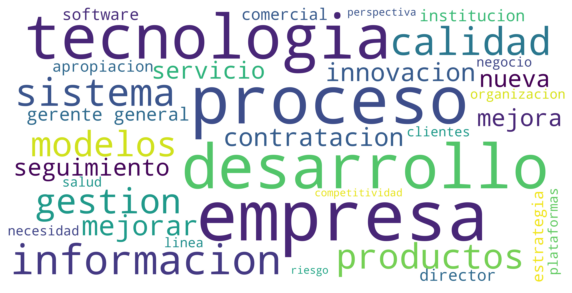

In [46]:
from wordcloud import WordCloud
wordcloud = WordCloud(min_font_size = 13, max_font_size=100, max_words=200, background_color="white",scale=10, width=800, height=400,stopwords = stop_words).generate(str(result))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear", cmap="PuBuGn")
plt.axis("off")
#plt.savefig("Nube de palabras empresas"+".png", dpi=500)
plt.show()